# **CMSC 320 Final Project (Replace this title)**

## By: Richard Liang

## **Part 1: Gathering Data**

### **1.1 Loading in Data Part I**

The dataset that I use is "Iowa Liquor Sales - 12 million alcoholic beverage sales in the Midwest", a CSV which can be found [here](https://www.kaggle.com/residentmario/iowa-liquor-sales) on Kaggle. 

Because this dataset contains over 12 million rows of data, which is around 3.4GB, I decided that it would be a good idea to take a random sample of 0.5% of the original CSV to analyze. By doing this, I can whittle down our original dataset to 62,955 rows, or around 17 MB of data, which allows my code to perform a lot faster.

To sample from the original dataset to create a smaller one, I wrote a Python script, which uses the Pandas library. The code is detailed below:



```
import pandas as pd

# read in the humongous CSV into a Pandas dataframe
full_data = pd.read_csv('Iowa_Liquor_Sales.csv')

# a random 0.5% sample of full_data without replacement
sampled_data = full_data.sample(frac=0.005)

# export sampled_data into another CSV
sampled_data.to_csv('iowa_liquor_sales_sample.csv', index=False)
```

After creating `iowa_liquor_sales_sample.csv`, I then uploaded the file to GitHub so it could be accessible online [here](https://raw.githubusercontent.com/RYLiang18/Richard-CMSC-320-Final-Project-F2020/main/iowa_liquor_sales_sample.csv) instead of locally



### **1.2 Loading in Data Part II**

#### **1.2.1 Imports**

Here, we will be using the `pandas` data analysis library so that we can read in our CSV dataset and save it as a **dataframe**, allowing us to do various forms of data parsing and management. 

Additionally, we will also be using the `numpy` library. The main purpose of numpy here in this section will be to help us identify which rows in our pandas dataframe having missing attributes, which will be marked with `np.nan`

Both of these libraries, including all (or at least most) of the libraries used in this tutorial can be installed using the [Anaconda](https://docs.anaconda.com/) package manager

In [1]:
import pandas as pd
import numpy as np

#### **1.2.2 Loading in Data**

As mentioned earlier, the dataset I will be using in this tutorial is `iowa_liquor_sales_sample.csv`, which I saved on GitHub. Because of this, instead of having to download the dataset, I can access it directly from the internet

In [2]:
all_data = pd.read_csv('https://raw.githubusercontent.com/RYLiang18/Richard-CMSC-320-Final-Project-F2020/main/iowa_liquor_sales_sample.csv')
data = pd.read_csv('https://raw.githubusercontent.com/RYLiang18/Richard-CMSC-320-Final-Project-F2020/main/iowa_liquor_sales_sample.csv')

In [3]:
all_data

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-01582800052,11/14/2016,2629,Hy-Vee Food Store #2 / Council Bluffs,1745 Madison Ave,Council Bluffs,51503,1745 Madison Ave\nCouncil Bluffs 51503\n(41.24...,78.0,POTTAWATTA,1011200.0,Straight Bourbon Whiskies,421.0,SAZERAC COMPANY INC,16518,Ancient Age Bourbon,6,1750,$11.80,$17.70,1,$106.20,1.75,0.46
1,INV-04183000098,04/05/2017,4509,A J'S LIQUOR II,2515 Chamberlain,Ames,50010,"2515 Chamberlain\nAmes 50010\n(42.021461, -93....",85.0,STORY,1062300.0,Aged Dark Rum,259.0,Heaven Hill Brands,43991,Admiral Nelson Black Patch,12,750,$6.96,$10.44,1,$125.28,0.75,0.19
2,S04167100031,02/20/2012,2627,Hy-Vee Wine and Spirits #1,3424 MARTIN LUTHER KING JR PKW,DES MOINES,50310,3424 MARTIN LUTHER KING JR PKW\nDES MOINES 503...,77.0,Polk,1031080.0,VODKA 80 PROOF,55.0,Sazerac North America,35316,Barton Vodka,12,750,$3.37,$5.05,12,$60.60,9.00,2.38
3,S11597500006,04/11/2013,4617,Lickety Liquor,2501 HUBBELL AVE,DES MOINES,50317,2501 HUBBELL AVE\nDES MOINES 50317\n(41.607817...,77.0,Polk,1031080.0,VODKA 80 PROOF,300.0,Mccormick Distilling Company,36903,Mccormick Vodka,48,200,$1.13,$1.70,48,$81.60,9.60,2.54
4,INV-02904200001,01/25/2017,5264,Casey's General Store # 2177/Mitchel,"309, Center Ave",Mitchellville,50169.0,"309, Center Ave\nMitchellville 50169\n(41.6634...",77.0,POLK,1012100.0,Canadian Whiskies,115.0,CONSTELLATION BRANDS INC,11776,Black Velvet,12,750,$5.23,$7.85,1,$94.20,0.75,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,INV-02566000014,01/05/2017,3899,Wal-Mart 3762 / WDM,6365 Stagecoach Dr,West Des Moines,50266.0,6365 Stagecoach Dr\nWest Des Moines 50266\n(41...,77.0,POLK,1031000.0,American Vodka,205.0,E & J Gallo Winery,36971,New Amsterdam Vodka,6,1750,$14.00,$21.00,1,$119.88,1.75,0.46
62951,S11087500015,03/13/2013,4202,Fareway Stores #829 / Sioux City,4267 SERGEANT RD,SIOUX CITY,51106,4267 SERGEANT RD\nSIOUX CITY 51106\n(42.451213...,97.0,Woodbury,1012300.0,IRISH WHISKIES,370.0,Pernod Ricard USA/Austin Nichols,15626,Jameson,12,750,$13.90,$20.85,3,$62.55,2.25,0.59
62952,S22496800024,11/20/2014,4214,New Star Liquor / Lafayet / Waterloo,1309 LAFAYETTE ST,WATERLOO,50703,"1309 LAFAYETTE ST\nWATERLOO 50703\n(42.494092,...",7.0,Black Hawk,1031200.0,VODKA FLAVORED,260.0,Diageo Americas,77740,Smirnoff Raspberry,12,750,$8.25,$12.38,3,$37.14,2.25,0.59
62953,INV-00081700023,09/01/2016,4057,Tequila's Liquor Store,1434 Des Moines St Ste 5,Des Moines,50316.0,1434 Des Moines St Ste 5\nDes Moines 50316\n(4...,77.0,POLK,1070000.0,Cocktails / RTD,395.0,PROXIMO,58888,Jose Cuervo Authentic Lime Margarita 4pk Cans,6,800,$3.88,$5.82,1,$34.92,0.80,0.21


### **1.3 Tidying Data**

**Dropping unused columns**

In [4]:
# Let's drop unused columns
data = data.drop(
  ['Invoice/Item Number', 'Store Name', 'Address', 'Store Number'],
  axis = 1
)

**Creating a new column that stores the coordinates of each store**

In [5]:
# Remove entries that are missing the 'Store Location' Attribute
data = data.dropna(subset=['Store Location'])

In [6]:
# adding a new column to store liquor store coordinates
data['store_coords'] = None

In [7]:
import re

In [8]:
for i, row in data.iterrows():
  # get store location string
  store_loc_str = row['Store Location']

  # extract the coordinates part of the string
  store_coord_str = re.search(r'\((.*?)\)',store_loc_str)
  if store_coord_str is None:
    continue
  store_coord_str = store_coord_str.group(1)

  # splitting into [lat, lng]
  store_coords = store_coord_str.split(',')
  store_coords = [float(numeric_string) for numeric_string in store_coords]

  # saving store_coords into data
  if len(store_coords) == 2:
    data.at[i, 'store_coords'] = store_coords


In [9]:
# now that we ahve coordinates, we can drop the Store Location column
data.drop(['Store Location'], axis = 1)

,Date,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),store_coords
0,11/14/2016,Council Bluffs,51503,78.0,POTTAWATTA,1011200.0,Straight Bourbon Whiskies,421.0,SAZERAC COMPANY INC,16518,Ancient Age Bourbon,6,1750,$11.80,$17.70,1,$106.20,1.75,0.46,"[41.242732, -95.825137]"
1,04/05/2017,Ames,50010,85.0,STORY,1062300.0,Aged Dark Rum,259.0,Heaven Hill Brands,43991,Admiral Nelson Black Patch,12,750,$6.96,$10.44,1,$125.28,0.75,0.19,"[42.021461, -93.650838]"
2,02/20/2012,DES MOINES,50310,77.0,Polk,1031080.0,VODKA 80 PROOF,55.0,Sazerac North America,35316,Barton Vodka,12,750,$3.37,$5.05,12,$60.60,9.00,2.38,"[41.626402, -93.651112]"
3,04/11/2013,DES MOINES,50317,77.0,Polk,1031080.0,VODKA 80 PROOF,300.0,Mccormick Distilling Company,36903,Mccormick Vodka,48,200,$1.13,$1.70,48,$81.60,9.60,2.54,"[41.607817, -93.570489]"
4,01/25/2017,Mitchellville,50169.0,77.0,POLK,1012100.0,Canadian Whiskies,115.0,CONSTELLATION BRANDS INC,11776,Black Velvet,12,750,$5.23,$7.85,1,$94.20,0.75,0.19,"[41.663434, -93.358095]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,01/05/2017,West Des Moines,50266.0,77.0,POLK,1031000.0,American Vodka,205.0,E & J Gallo Winery,36971,New Amsterdam Vodka,6,1750,$14.00,$21.00,1,$119.88,1.75,0.46,"[41.559117, -93.79515]"
62951,03/13/2013,SIOUX CITY,51106,97.0,Woodbury,1012300.0,IRISH WHISKIES,370.0,Pernod Ricard USA/Austin Nichols,15626,Jameson,12,750,$13.90,$20.85,3,$62.55,2.25,0.59,"[42.451213, -96.356879]"
62952,11/20/2014,WATERLOO,50703,7.0,Black Hawk,1031200.0,VODKA FLAVORED,260.0,Diageo Americas,77740,Smirnoff Raspberry,12,750,$8.25,$12.38,3,$37.14,2.25,0.59,"[42.494092, -92.3272]"
62953,09/01/2016,Des Moines,50316.0,77.0,POLK,1070000.0,Cocktails / RTD,395.0,PROXIMO,58888,Jose Cuervo Authentic Lime Margarita 4pk Cans,6,800,$3.88,$5.82,1,$34.92,0.80,0.21,"[41.594694, -93.59713]"


**Normalizing County Number and County Names**

In [10]:
# Remove entries that are missing the 'County Number' and 'County' Attribute
data = data.dropna(subset=['County Number', 'County'])
# making county to lower case
data["County"] = data["County"].str.lower()

In [11]:
county_dict = dict()
county_dict[78.0] = 'pottawattamie'

In [12]:
for i, row in data.iterrows():
  county_number = row['County Number']
  
  if county_number in county_dict:
    data.at[i, 'County'] = county_dict[county_number]
  else:
    county_dict[county_number] = row['County']
  

**Normalizing City Names**

In [13]:
data['City'] = data['City'].str.lower()

In [14]:
data

,Date,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),store_coords
0,11/14/2016,council bluffs,51503,1745 Madison Ave\nCouncil Bluffs 51503\n(41.24...,78.0,pottawattamie,1011200.0,Straight Bourbon Whiskies,421.0,SAZERAC COMPANY INC,16518,Ancient Age Bourbon,6,1750,$11.80,$17.70,1,$106.20,1.75,0.46,"[41.242732, -95.825137]"
1,04/05/2017,ames,50010,"2515 Chamberlain\nAmes 50010\n(42.021461, -93....",85.0,story,1062300.0,Aged Dark Rum,259.0,Heaven Hill Brands,43991,Admiral Nelson Black Patch,12,750,$6.96,$10.44,1,$125.28,0.75,0.19,"[42.021461, -93.650838]"
2,02/20/2012,des moines,50310,3424 MARTIN LUTHER KING JR PKW\nDES MOINES 503...,77.0,polk,1031080.0,VODKA 80 PROOF,55.0,Sazerac North America,35316,Barton Vodka,12,750,$3.37,$5.05,12,$60.60,9.00,2.38,"[41.626402, -93.651112]"
3,04/11/2013,des moines,50317,2501 HUBBELL AVE\nDES MOINES 50317\n(41.607817...,77.0,polk,1031080.0,VODKA 80 PROOF,300.0,Mccormick Distilling Company,36903,Mccormick Vodka,48,200,$1.13,$1.70,48,$81.60,9.60,2.54,"[41.607817, -93.570489]"
4,01/25/2017,mitchellville,50169.0,"309, Center Ave\nMitchellville 50169\n(41.6634...",77.0,polk,1012100.0,Canadian Whiskies,115.0,CONSTELLATION BRANDS INC,11776,Black Velvet,12,750,$5.23,$7.85,1,$94.20,0.75,0.19,"[41.663434, -93.358095]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,01/05/2017,west des moines,50266.0,6365 Stagecoach Dr\nWest Des Moines 50266\n(41...,77.0,polk,1031000.0,American Vodka,205.0,E & J Gallo Winery,36971,New Amsterdam Vodka,6,1750,$14.00,$21.00,1,$119.88,1.75,0.46,"[41.559117, -93.79515]"
62951,03/13/2013,sioux city,51106,4267 SERGEANT RD\nSIOUX CITY 51106\n(42.451213...,97.0,woodbury,1012300.0,IRISH WHISKIES,370.0,Pernod Ricard USA/Austin Nichols,15626,Jameson,12,750,$13.90,$20.85,3,$62.55,2.25,0.59,"[42.451213, -96.356879]"
62952,11/20/2014,waterloo,50703,"1309 LAFAYETTE ST\nWATERLOO 50703\n(42.494092,...",7.0,black hawk,1031200.0,VODKA FLAVORED,260.0,Diageo Americas,77740,Smirnoff Raspberry,12,750,$8.25,$12.38,3,$37.14,2.25,0.59,"[42.494092, -92.3272]"
62953,09/01/2016,des moines,50316.0,1434 Des Moines St Ste 5\nDes Moines 50316\n(4...,77.0,polk,1070000.0,Cocktails / RTD,395.0,PROXIMO,58888,Jose Cuervo Authentic Lime Margarita 4pk Cans,6,800,$3.88,$5.82,1,$34.92,0.80,0.21,"[41.594694, -93.59713]"


**Converting `State Bottle Retail` into float**

In [15]:
data['State Bottle Retail'] = data['State Bottle Retail'].str.replace('$', '')

In [16]:
data["State Bottle Retail"] = pd.to_numeric(data["State Bottle Retail"], downcast="float")

## **Part 3: Exploratory Data Analysis**

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
import folium
from folium import plugins

### **3.1 Listing Liquor Sales by Location**

In [19]:
liquor_map = folium.Map(
  location = [42.229799658046346, -93.59540792864269],
  zoom_start = 8
)

In [20]:
store_coords_lst = data['store_coords'].tolist()
store_coords_lst = [i for i in store_coords_lst if i]

In [21]:
liquor_map.add_child(
  plugins.HeatMap(
    data = store_coords_lst,
    radius = 15
  )
)

The most liquor sales seem to be in Des Moines, Cedar Rapids, Iowa City, Waterloo, Davenport, and Ames

### **3.1 Plotting Liquor Prices by County**

Let's see which counties Des Moines, Cedar Rapids, Iowa City, Waterloo, Davenport, and Ames are in

In [22]:
target_cities = {'des moines', 'cedar rapids', 'iowa city', 'waterloo', 'davenport', 'ames'}
target_counties = set()

In [23]:
for _, row in data.iterrows():
  if row['City'] in target_cities:
    target_counties.add(row['County'])

In [24]:
target_counties

{'black hawk', 'johnson', 'linn', 'polk', 'scott', 'story'}

In [25]:
# now let's get 6 random counties that aren't in target_counties
six_more = None

# simulate a do while loop
while True:
  six_more = np.random.choice(
    data.County.unique(),
    6,
    replace = False
  )

  has_duplicates = np.any(np.in1d(
    six_more,
    np.array(list(target_counties))
  ))
  
  if not has_duplicates:
    break

  
six_more

array(['jackson', 'lucas', 'guthrie', 'osceola', 'kossuth', 'hardin'],
      dtype=object)

In [26]:
target_counties.update(six_more)
target_counties

{'black hawk',
 'guthrie',
 'hardin',
 'jackson',
 'johnson',
 'kossuth',
 'linn',
 'lucas',
 'osceola',
 'polk',
 'scott',
 'story'}

In [27]:
target_counties_data = data.loc[data['County'].isin(target_counties)]

In [28]:
target_counties_data.columns

Index(['Date', 'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)',
       'store_coords'],
      dtype='object')

In [29]:
type(target_counties_data.loc[1, 'State Bottle Retail'])

numpy.float32

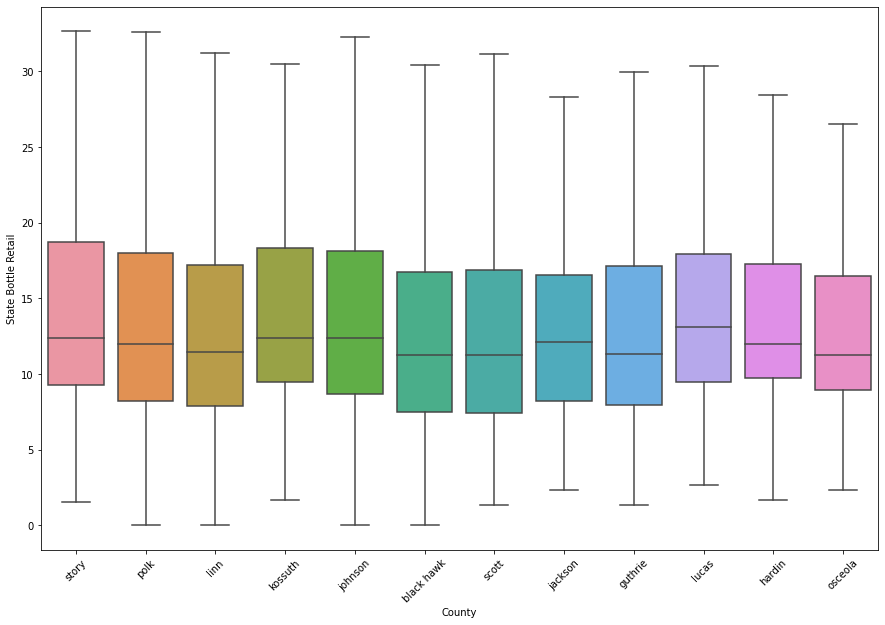

In [32]:
plt.figure(figsize=(15,10))
graph = sns.boxplot(
  x = 'County', 
  y = 'State Bottle Retail', 
  data = target_counties_data,
  showfliers = False
)
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)
plt.show()

From this box plot, we can see that the average price of a bottle of liquor sold in differnt counties in Iowa are about the same. It doesn't matter if you're in a county that consumes more liquor or not.